In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-counties-covid-19-dataset/us-counties.csv


# **Read dataset**

In [72]:
def show_df(filepath_or_buffer = "/kaggle/input/us-counties-covid-19-dataset/us-counties.csv"):
    """reads a csv file and displays Dataframe"""
    df = pd.read_csv(filepath_or_buffer)
    return df

co = show_df()

# **Get overview of the dataset**

In [73]:
type(show_df())

pandas.core.frame.DataFrame

In [74]:
co.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [75]:
co.shape

(2502832, 6)

In [76]:
co.describe()

,fips,cases,deaths
count,2.479154e+06,2.502832e+06,2.445227e+06
mean,3.139958e+04,1.003380e+04,1.616100e+02
std,1.634251e+04,4.752522e+04,8.203335e+02
min,1.001000e+03,0.000000e+00,0.000000e+00
25%,1.902300e+04,3.820000e+02,6.000000e+00
50%,3.001100e+04,1.773000e+03,3.300000e+01
75%,4.611100e+04,5.884000e+03,1.010000e+02
max,7.803000e+04,2.908425e+06,4.026700e+04


In [77]:
co.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [78]:
co.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

In [79]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 114.6+ MB


In [80]:
# How many states are there in this dataset? 
num_of_state = len(co.state.unique())
num_of_state

56

In [81]:
co.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [82]:
# check duplicates
co.duplicated().sum()

0

In [83]:
def check_nulls(column_name):
    """checks for null values in each column."""
    null_val = co[column_name].isna().sum()
    return null_val
    
date_null_count = check_nulls("date")
county_null_count = check_nulls("county")
state_null_count = check_nulls("state")
cases_null_count = check_nulls("cases")
deaths_null_count = check_nulls("deaths")

print(f"Number of null values in 'date' column: {date_null_count}")
print(f"Number of null values in 'county' column: {county_null_count}")
print(f"Number of null values in 'state' column: {state_null_count}")
print(f"Number of null values in 'cases' column: {cases_null_count}")
print(f"Number of null values in 'deaths' column: {deaths_null_count}")

Number of null values in 'date' column: 0
Number of null values in 'county' column: 0
Number of null values in 'state' column: 0
Number of null values in 'cases' column: 0
Number of null values in 'deaths' column: 57605


In [84]:
#drop na rows
co = co.dropna(subset = ['date', 'county', 'state', 'cases', 'deaths'],
              how = "any")

In [85]:
# check the total rows
date_null_count = check_nulls("date")
county_null_count = check_nulls("county")
state_null_count = check_nulls("state")
cases_null_count = check_nulls("cases")
deaths_null_count = check_nulls("deaths")

print(f"Number of null values in 'date' column: {date_null_count}")
print(f"Number of null values in 'county' column: {county_null_count}")
print(f"Number of null values in 'state' column: {state_null_count}")
print(f"Number of null values in 'cases' column: {cases_null_count}")
print(f"Number of null values in 'deaths' column: {deaths_null_count}")

old = 2502832
new = 2445227
total = old - new

print(f"The total of deleted row is {total} rows.")
print("------------------------------------------")

co.info()

Number of null values in 'date' column: 0
Number of null values in 'county' column: 0
Number of null values in 'state' column: 0
Number of null values in 'cases' column: 0
Number of null values in 'deaths' column: 0
The total of deleted row is 57605 rows.
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2445227 entries, 0 to 2502831
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   county  object 
 2   state   object 
 3   fips    float64
 4   cases   int64  
 5   deaths  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 130.6+ MB


# **Preprocess the dataset**

1. Change type of the "deaths" column from float to int
2. maybe add a new column showing proportion of cases and deaths
3. drop the flip column

In [86]:
def preprocessor(filename = "/kaggle/input/us-counties-covid-19-dataset/us-counties.csv"):
    """
    preprocesses data and displays Dataframe.
    The 'prop_of_deaths' column is inserted at position 5 and represents the proportion of deaths / cases
    """
    dtype_mapper = {"county" : "string",
                     "state" : "string",
                      "cases" : "int64",
                     "deaths" : "Int64"}
    df = (pd.read_csv(filename, dtype = dtype_mapper)
    .drop("fips", axis = 1))
    
    df['date'] = pd.to_datetime(df['date'])

    prop_of_deaths = (df["deaths"] / df["cases"] * 100).round(3)
    df.insert(5, "prop_of_deaths", prop_of_deaths)

    return df

cov = preprocessor()
cov.sample(3)

,date,county,state,cases,deaths,prop_of_deaths
62086,2020-04-16,San Luis Obispo,California,125,1,0.8
887938,2021-01-01,Racine,Wisconsin,19569,259,1.324
2309959,2022-03-15,Darlington,South Carolina,18859,303,1.607


# Analysis Part

**- 📊 General Descriptive Insights**

**1. Which counties reported the highest total number of cases and deaths?**

In [87]:
def summary(dataframe, column_name, top_n = 10):
    """
    Sorts a county summary DataFrame by a specified column and prints the top N counties.

    Args:
        df_summary (pd.DataFrame): The DataFrame containing aggregated county data
                                   (e.g., from a groupby.sum()).
        column_name (str): The name of the column to sort by (e.g., "cases", "deaths").
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    county_summary = dataframe.groupby("county")[["cases", "deaths"]].sum()
    sorted_df = county_summary.sort_values(by = column_name, ascending = False)
    
    print(f"\nTop {top_n} counties by total {column_name}:")
    print(sorted_df.head(top_n))
    
summary(cov, "cases", top_n=10)
summary(cov, "deaths", top_n=10)


Top 10 counties by total cases:
                   cases    deaths
county                            
Los Angeles    894043681  14008842
New York City  708511437  22997503
Maricopa       410158334   6481205
Cook           392572008   7172183
Miami-Dade     379467716   4425228
Orange         357802812   4571252
Harris         318131089   4378885
Jefferson      286628471   4332481
Montgomery     245504642   4269994
Clark          234789743   3698064

Top 10 counties by total deaths:
                   cases    deaths
county                            
New York City  708511437  22997503
Los Angeles    894043681  14008842
Cook           392572008   7172183
Maricopa       410158334   6481205
Orange         357802812   4571252
Miami-Dade     379467716   4425228
Harris         318131089   4378885
Wayne          164379157   4354898
Jefferson      286628471   4332481
Montgomery     245504642   4269994


**2. What is the average number of cases and deaths per county/state?**

In [88]:
def mean_value(dataframe, group_by_column, sort_by_metric="cases", top_n = 10):
    """
    Calculates average cases and deaths, sorts by a specified metric,
    and prints the top N results for a given grouping column.

    Args:
        df (pd.DataFrame): The input DataFrame (e.g., 'cov').
        group_by_column (str): The column to group by (e.g., "county", "state").
        sort_by_metric (str, optional): The metric to sort by ("cases" or "deaths").
                                        Defaults to "cases".
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    county_avg = dataframe.groupby([group_by_column])[["cases", "deaths"]].mean().round(3)
    sorted_avg = county_avg.sort_values(by=sort_by_metric, ascending=False)

    print(f"\nTop {top_n} {group_by_column.capitalize()}s by average {sort_by_metric}:")
    print(sorted_avg.head(top_n))

# For counties:
mean_value(cov, group_by_column="county", sort_by_metric="cases", top_n=5)
# For states:
mean_value(cov, group_by_column="state", sort_by_metric="cases", top_n=5)


Top 5 Countys by average cases:
                     cases     deaths
county                               
Los Angeles    1065606.294   16697.07
New York City   881233.131  28603.859
Maricopa        488865.714   7724.917
Miami-Dade      477919.038   5573.335
San Diego       272809.087   2633.427

Top 5 States by average cases:
                          cases    deaths
state                                    
California            61500.023    808.34
Arizona               54517.653   950.894
District of Columbia  50461.514   906.924
Massachusetts         43511.922   963.818
New Jersey            40909.474  1006.345


**3. How does the proportion of deaths to cases vary across states or over time?**

In [89]:
cov["prop_deaths"] = (cov["deaths"] / cov["cases"] * 100).round(3)

cov["month"] = cov["date"].dt.to_period("M")

monthly = (
    cov.groupby("month")
       .agg({"cases": "sum", "deaths": "sum"})
)

monthly["prop_deaths"] = (monthly["deaths"] / monthly["cases"] * 100).round(3)

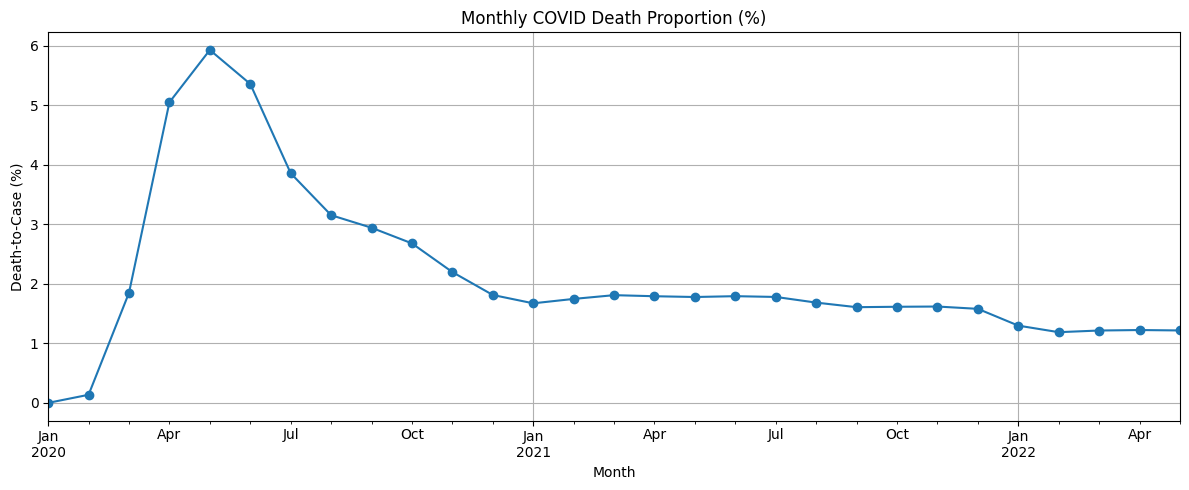

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

monthly["prop_deaths"].plot(figsize=(12,5), marker="o", title="Monthly COVID Death Proportion (%)")
plt.ylabel("Death-to-Case (%)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


**4. Cases/death comparison in each state**

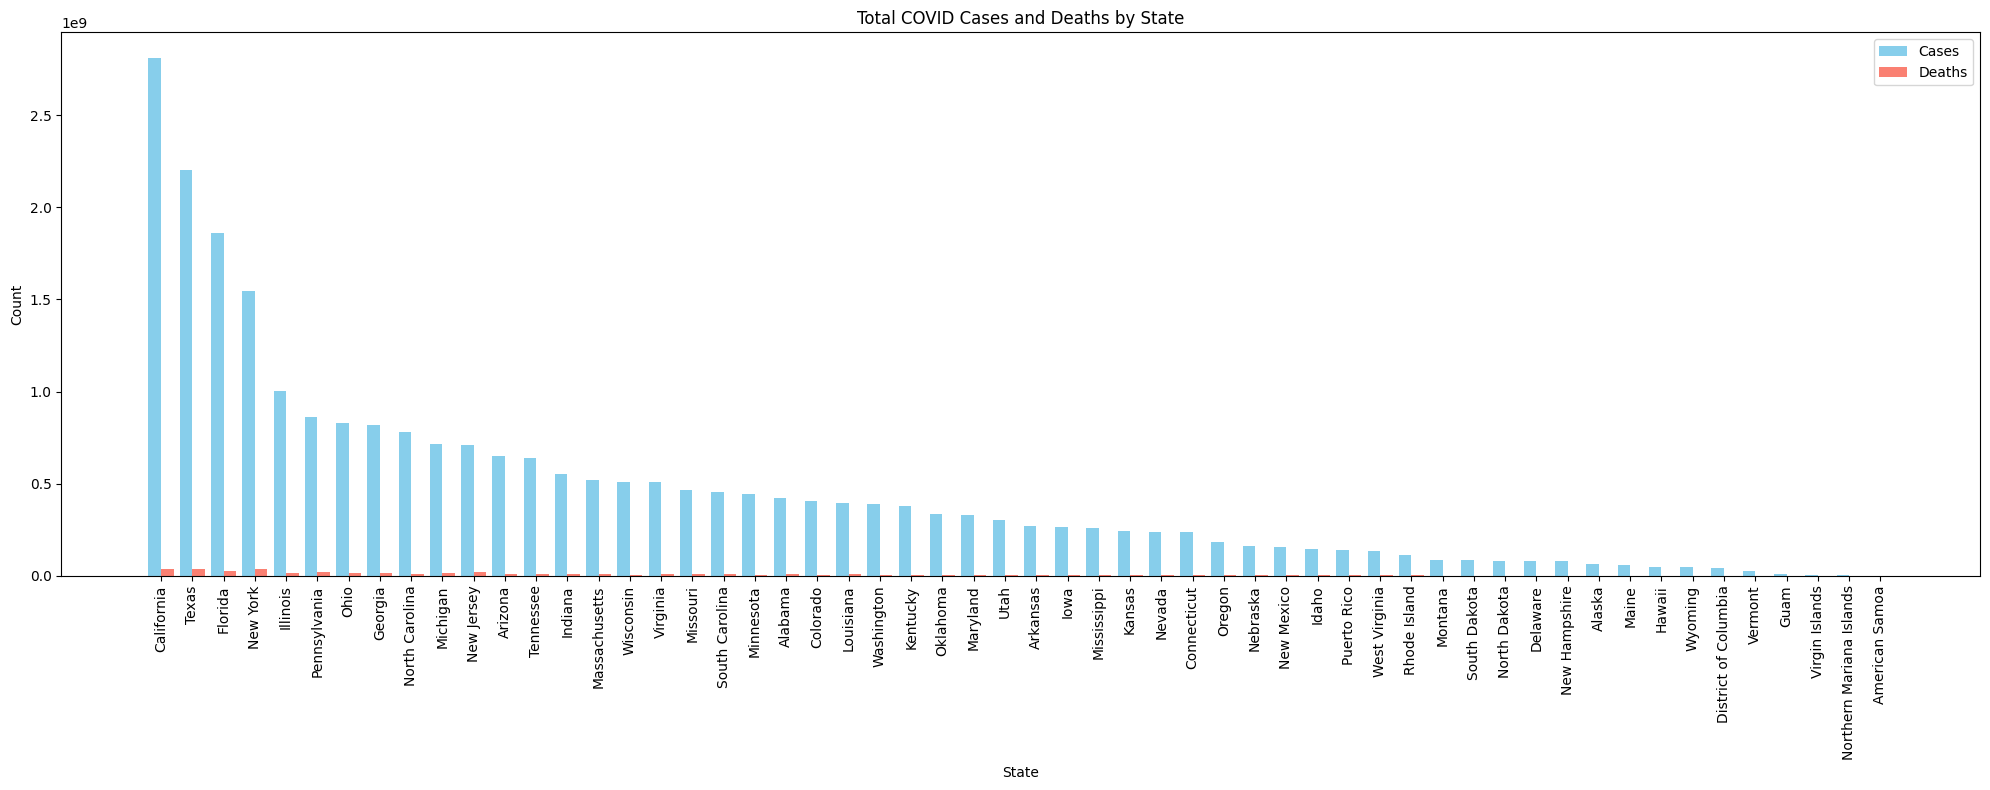

In [91]:
# cases / deaths in top 5 states
state_summary = state_summary.sort_values("cases", ascending=False)

# x-axis positions
x = np.arange(len(state_summary))
width = 0.4

plt.figure(figsize=(20, 8))

# Twin bars
plt.bar(x - width/2, state_summary["cases"], width, label="Cases", color="skyblue")
plt.bar(x + width/2, state_summary["deaths"], width, label="Deaths", color="salmon")

# Labeling
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Total COVID Cases and Deaths by State")
plt.xticks(x, state_summary["state"], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

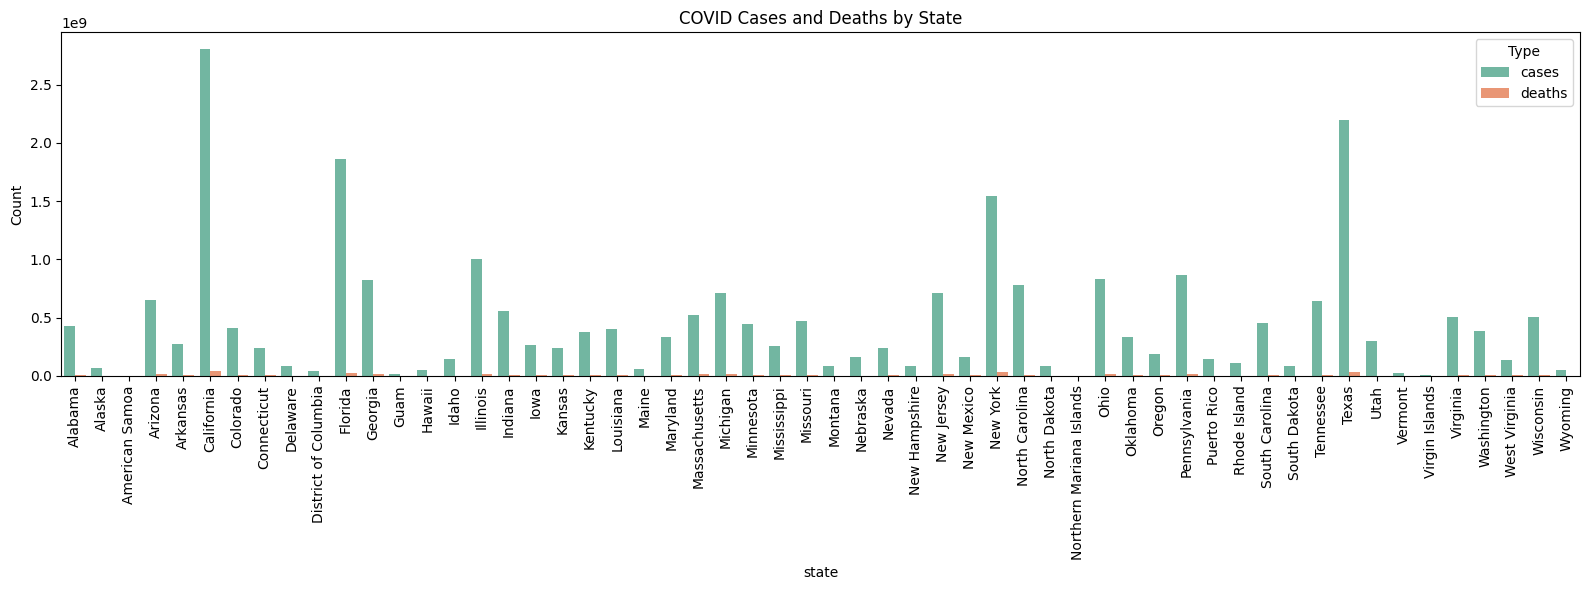

In [92]:
state_summary = (
    cov.groupby("state")[["cases", "deaths"]]
    .sum()
    .reset_index()
)

melted = state_summary.melt(id_vars="state", value_vars=["cases", "deaths"],
                            var_name="Type", value_name="Count")

plt.figure(figsize=(16, 6))
sns.barplot(data=melted, x="state", y="Count", hue="Type", palette="Set2")
plt.xticks(rotation=90)
plt.title("COVID Cases and Deaths by State")
plt.tight_layout()
plt.show()

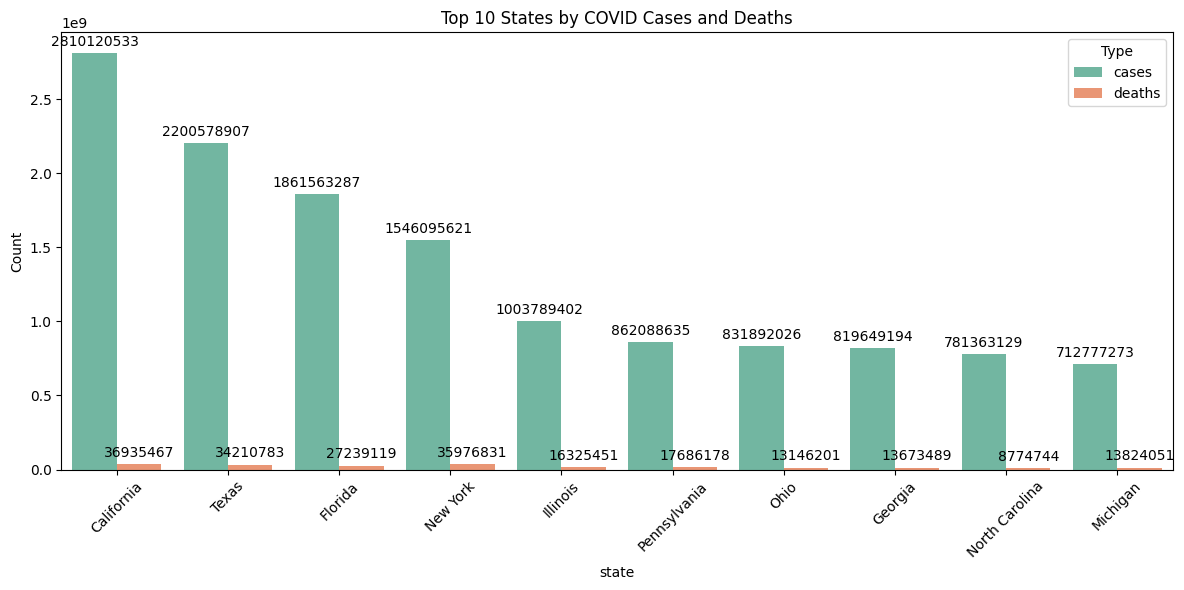

In [93]:
# Step 1: Group by state and get total cases & deaths
state_summary = (
    cov.groupby("state")[["cases", "deaths"]]
    .sum()
    .reset_index()
)


top10 = state_summary.sort_values("cases", ascending=False).head(10)

# Melt for twin bars (long format)
melted = top10.melt(id_vars="state", value_vars=["cases", "deaths"],
                    var_name="Type", value_name="Count")

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted, x="state", y="Count", hue="Type", palette="Set2")

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title("Top 10 States by COVID Cases and Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
import plotly.express as px

fig = px.bar(melted, 
             x="state", 
             y="Count", 
             color="Type", 
             barmode="group",
             text_auto=".2s",
             title="Top 10 States by COVID Cases and Deaths",
             color_discrete_sequence=["#636EFA", "#EF553B"])

fig.update_layout(xaxis_title="State",
                  yaxis_title="Count",
                  legend_title="Type",
                  template="plotly_white")
fig.show()


**5. What is the max/min date of this dataset?**

In [95]:
def check_max_min(column_name):
    """checks max and min values in a column."""
    max_val = cov[column_name].max()
    min_val = cov[column_name].min()
    return f"The earliest date is {min_val.date()} and the latest date is {max_val.date()}."

print(check_max_min("date"))

The earliest date is 2020-01-21 and the latest date is 2022-05-13.
